#Age and Height Analysis and Prediction 

ML Project using Simple Linear Regression in Python. Hope you get a clear understanding of the implementation.

# 1. Importing Data Set

In [32]:
!wget 'https://archive.org/download/ages-and-heights/AgesAndHeights.pkl'

--2021-05-27 08:33:45--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2021-05-27 08:33:46--  https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia801802.us.archive.org (ia801802.us.archive.org)... 207.241.230.172
Connecting to ia801802.us.archive.org (ia801802.us.archive.org)|207.241.230.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl.1’

AgesAndHeights.pkl. 100%[===================>]   2.35K  --.-KB/s    in 0s      

2021-05-27 08:33:46 (333 MB/s) - ‘AgesAndHeights.pkl.1’ saved [2406/2406]



# 2. Visualising the Data

Data Visualisation

In [33]:
import pandas as pd
import numpy as np
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In above Data:
Age -> Years
Height -> Inches

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5e2be2950>,
      dtype=object)

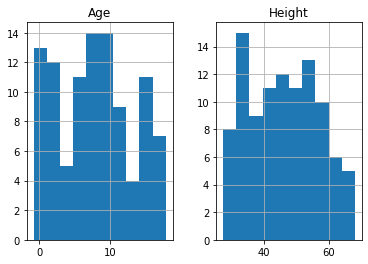

In [34]:
raw_data.hist()

In [35]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


# 3. Data Cleaning

In [36]:
cleaned_data = raw_data[raw_data['Age'] > 0]
cleaned_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [37]:
cleaned_data.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


.corr() relates how closely the initial initial column is related with the remaining columns where it's values lie between -1 to 1. If it's 0 then the columns are independent with each other.

In [38]:
cleaned_data.corr()

,Age,Height
Age,1.00000,0.97722
Height,0.97722,1.00000


**Visualize the Cleaned Data**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5e2a4b950>,
      dtype=object)

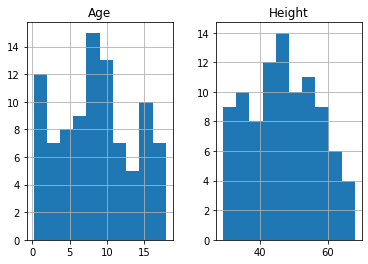

In [39]:
cleaned_data.hist()

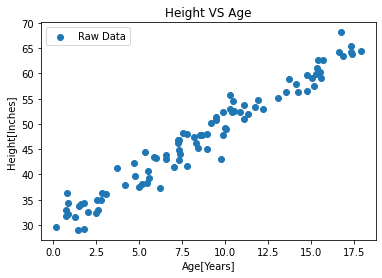

In [40]:
import matplotlib.pyplot as plt
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights, label='Raw Data')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

# 4. Build the Model and Train it

Use ```ML Algorithms``` to build and train the model. Here, ```Simple Linear Regression``` is used. Before that let's create a necessary environment to build the model.

Actual -> $y = \alpha + \beta  x + \epsilon$

True -> $\hat{y} = \alpha + \beta  x$

In [41]:
parameters = {'alpha' : 40 ,'beta' : 4}

In [42]:
def y_hat(age, params):
  alpha = params['alpha']
  beta = params['beta']
  return alpha + beta * age
age = int(input('Enter age: '))
y_hat(age, parameters)

Enter age: 20


120

In [43]:
def learn_parameters(data, params):
    x, y = data['Age'], data['Height']
    x_bar, y_bar = x.mean(), y.mean()
    x, y = x.to_numpy(), y.to_numpy()
    beta = sum( ((x-x_bar) * (y-y_bar)) / sum( (x-x_bar)**2))
    alpha = y_bar - beta * x_bar
    params['alpha'] = alpha
    params['beta'] = beta

In [44]:
new_parameter = {'alpha' : -2, 'beta' : 1000}
learn_parameters(cleaned_data, new_parameter)
new_parameter

{'alpha': 29.961857614615834, 'beta': 2.0014168989106302}

In [45]:
spaced_ages = list(range(19))
spaced_untrained_predictions = [y_hat(x, parameters) for x in spaced_ages]
print(spaced_untrained_predictions)

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112]


Plotting Spaced Untrained Predicted Values

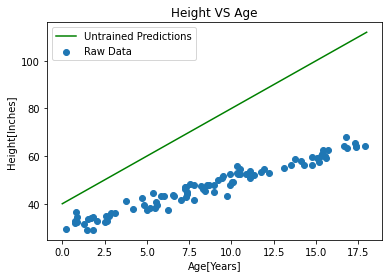

In [46]:
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'green')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

Plotting Spaced Trained Predicted Values

Trained Predicted Values:  [29.961857614615834, 31.963274513526464, 33.96469141243709, 35.966108311347725, 37.96752521025836, 39.968942109168985, 41.97035900807961, 43.971775906990246, 45.97319280590088, 47.974609704811506, 49.97602660372213, 51.97744350263277, 53.9788604015434, 55.98027730045403, 57.981694199364654, 59.98311109827529, 61.98452799718592, 63.985944896096555, 65.98736179500717]


Text(0, 0.5, 'Height[Inches]')

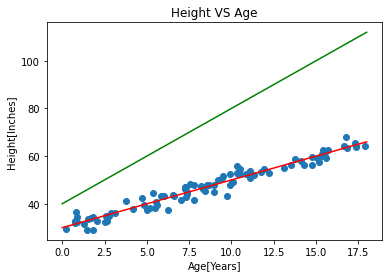

In [47]:
spaced_trained_predictions = [y_hat(x, new_parameter) for x in spaced_ages]
print('Trained Predicted Values: ',spaced_trained_predictions)
plt.scatter(ages,heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'green')
plt.plot(spaced_ages, spaced_trained_predictions, label = 'Trained Predictions', color = 'red')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')

# 5. Make Predictions on Unseen Data

Use the Model to make accurate Predictions on DATA

In [48]:
new_age = int(input('Enter age to predict height: '))
y_hat(new_age, new_parameter)

Enter age to predict height: 13


55.98027730045403

Thanks for viewing the article and I hope it was helpful and informative.

In [49]:
df = raw_data.copy()

In [50]:
X = cleaned_data.iloc[:,:-1].values
Y = cleaned_data.iloc[:,-1].values

In [51]:
Y.shape

(93,)

#Model: Linear Regression Model using sklearn Module


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

In [53]:
train_x.shape, test_x.shape

((74, 1), (19, 1))

In [54]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred =model.predict(test_x)

In [56]:
y_pred

array([41.92681506, 57.04990228, 40.34324371, 33.01415501, 52.13087893,
       44.74436733, 50.76196745, 43.08390217, 52.20994027, 35.47916818,
       41.12149211, 48.88648979, 44.48956635, 35.18312424, 40.97689949,
       52.67528325, 31.64638094, 53.80020426, 64.65071075])

In [57]:
accuracy = model.score(test_x, test_y)
print(accuracy*100)

97.26700586407128


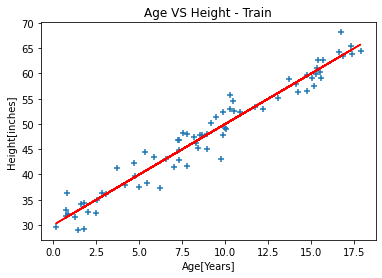

In [58]:
plt.scatter(train_x, train_y, marker = '+')
plt.xlabel('Age[Years]')
plt.ylabel('Height[inches]')
plt.title('Age VS Height - Train')
plt.plot(train_x, model.predict(train_x), color = 'r')
plt.show()

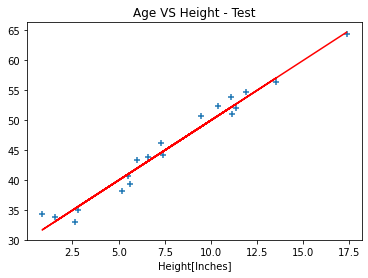

In [59]:
plt.scatter(test_x, test_y, marker = '+')
plt.xlabel('Age[Years]')
plt.xlabel('Height[Inches]')
plt.title('Age VS Height - Test')
plt.plot(test_x, model.predict(test_x), color = 'r')
plt.show()

#Predictions on Unseen Data - Linear Regression Model

In [60]:
data_ext = float(input('Enter age to predict Height: '))
ext_data = np.array([[data_ext]])
ext_data_pred = model.predict(ext_data)
print('Estimated Height of the person of ' + str(data_ext)  + ' years is approximately ' + str(ext_data_pred))

Enter age to predict Height: 15
Estimated Height of the person of 15.0 years is approximately [59.95928564]
